<a href="https://colab.research.google.com/github/MeenatchiKV/My-ML-Learnings/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout,AveragePooling2D
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import regularizers

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train,x_test = x_train/255,x_test/255

In [ ]:
import numpy as np
#classes = np.unique(y_train)
classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
n_classes = len(classes)

print("Classes: ",classes)


Classes:  ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


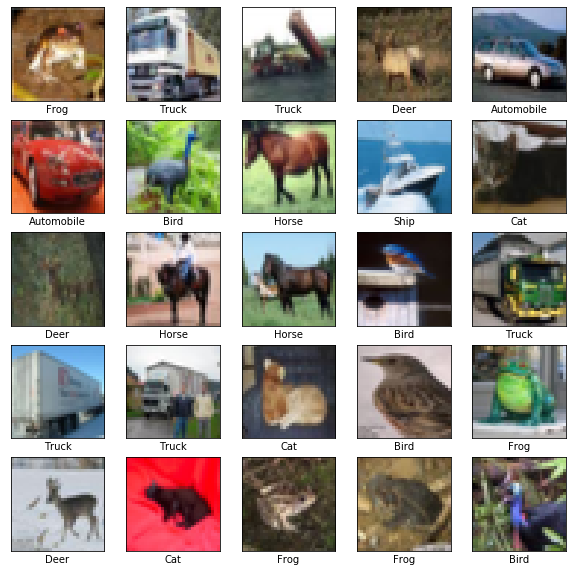

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i][0]])
plt.show()

In [ ]:
y_train = to_categorical(y_train)
y = y_test
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
def createModel():
  model=Sequential()

  '''
  Model 1:
  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3),strides=(1,1),dilation_rate=(1,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))

  model.add(Flatten())
  model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dense(n_classes,activation='softmax'))
  
  '''

  '''
  Model 2:
  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3),strides=(1,1),dilation_rate=(1,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  model.add(Dropout(0.25))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
 
  model.add(Flatten())
  model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  #model.add(Dropout(0.5))
  model.add(Dense(n_classes,activation='softmax'))
  '''

  '''
  Model 3:
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(n_classes,activation='softmax'))

  Model 4:
  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3),strides=(1,1),dilation_rate=(1,1)))
  model.add(AveragePooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(AveragePooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))

  model.add(Flatten())
  model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dense(n_classes,activation='softmax'))
  
  '''
  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3),strides=(1,1),dilation_rate=(1,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))

  model.add(Flatten())
  model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dense(n_classes,activation='softmax'))

  
  return model

In [ ]:
model1 = createModel()
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [ ]:
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 23s 453us/step - loss: 1.6722 - acc: 0.4314 - val_loss: 1.4649 - val_acc: 0.4963
Epoch 2/10
50000/50000 [==============================] - 8s 168us/step - loss: 1.3190 - acc: 0.5707 - val_loss: 1.3284 - val_acc: 0.5634
Epoch 3/10
50000/50000 [==============================] - 8s 166us/step - loss: 1.1745 - acc: 0.6273 - val_loss: 1.2545 - val_acc: 0.6007
Epoch 4/10
50000/50000 [==============================] - 8s 164us/step - loss: 1.0888 - acc: 0.6625 - val_loss: 1.2125 - val_acc: 0.6186
Epoch 5/10
50000/50000 [==============================] - 8s 163us/step - loss: 1.0301 - acc: 0.6838 - val_loss: 1.0578 - val_acc: 0.6752
Epoch 6/10
50000/50000 [==============================] - 8s 166us/step - loss: 0.9842 - acc: 0.7010 - val_loss: 1.0909 - val_acc: 0.6633
Epoch 7/10
50000/50

In [ ]:
predictions = model1.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 165us/step - loss: 0.8440 - acc: 0.7516 - val_loss: 0.9108 - val_acc: 0.7314
Epoch 2/20
50000/50000 [==============================] - 8s 163us/step - loss: 0.8224 - acc: 0.7569 - val_loss: 1.0219 - val_acc: 0.7020
Epoch 3/20
50000/50000 [==============================] - 8s 164us/step - loss: 0.8033 - acc: 0.7637 - val_loss: 0.9475 - val_acc: 0.7172
Epoch 4/20
50000/50000 [==============================] - 8s 163us/step - loss: 0.7927 - acc: 0.7682 - val_loss: 0.9354 - val_acc: 0.7274
Epoch 5/20
50000/50000 [==============================] - 8s 162us/step - loss: 0.7786 - acc: 0.7734 - val_loss: 1.0280 - val_acc: 0.6996
Epoch 6/20
50000/50000 [==============================] - 8s 162us/step - loss: 0.7580 - acc: 0.7805 - val_loss: 1.0004 - val_acc: 0.7114
Epoch 7/20
50000/50000 [==============================] - 8s 165us/step - loss: 0.7461 - acc: 0.7844 - val_loss: 1.0043 - 

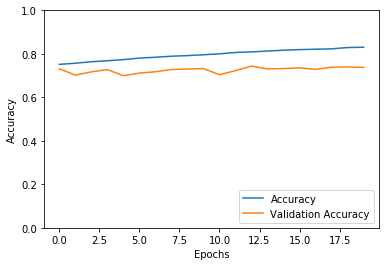

In [ ]:
#plo & Evaluate

plt.plot(predictions.history['acc'],label="Accuracy")
plt.plot(predictions.history['val_acc'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc=4)
test_loss,test_acc = model1.evaluate(x_test,y_test,verbose=2)

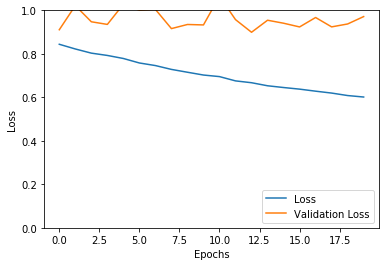

In [ ]:
plt.plot(predictions.history['loss'],label="Loss")
plt.plot(predictions.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc=4)
test_loss,test_acc = model1.evaluate(x_test,y_test,verbose=2)

In [ ]:
model2 = createModel()
model2.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         


In [ ]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
predictions = model2.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 26s 529us/step - loss: 1.7884 - acc: 0.3610 - val_loss: 1.4377 - val_acc: 0.4888
Epoch 2/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.3513 - acc: 0.5184 - val_loss: 1.3002 - val_acc: 0.5464
Epoch 3/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.1719 - acc: 0.5927 - val_loss: 1.1247 - val_acc: 0.6176
Epoch 4/20
50000/50000 [==============================] - 11s 223us/step - loss: 1.0507 - acc: 0.6354 - val_loss: 0.9975 - val_acc: 0.6610
Epoch 5/20
50000/50000 [==============================] - 10s 207us/step - loss: 0.9682 - acc: 0.6675 - val_loss: 1.0490 - val_acc: 0.6594
Epoch 6/20
50000/50000 [==============================] - 11s 216us/step - loss: 0.9091 - acc: 0.6901 - val_loss: 0.9745 - val_acc: 0.6748
Epoch 7/20
500

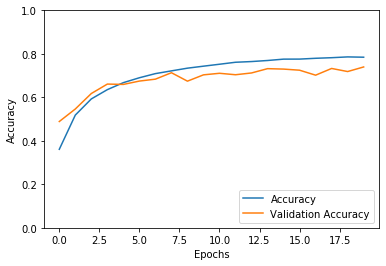

In [ ]:
#plo & Evaluate

plt.plot(predictions.history['acc'],label="Accuracy")
plt.plot(predictions.history['val_acc'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc=4)
test_loss,test_acc = model2.evaluate(x_test,y_test,verbose=2)

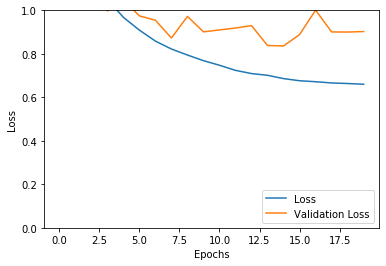

In [ ]:
plt.plot(predictions.history['loss'],label="Loss")
plt.plot(predictions.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc=4)
test_loss,test_acc = model2.evaluate(x_test,y_test,verbose=2)

In [ ]:
model3 = createModel()
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
import keras
model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
predictions = model3.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 242us/step - loss: 1.5185 - acc: 0.4607 - val_loss: 1.1216 - val_acc: 0.6046
Epoch 2/20
50000/50000 [==============================] - 11s 222us/step - loss: 1.2208 - acc: 0.5795 - val_loss: 1.0507 - val_acc: 0.6330
Epoch 3/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.1701 - acc: 0.6019 - val_loss: 1.1853 - val_acc: 0.6165
Epoch 4/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.1692 - acc: 0.6106 - val_loss: 1.1058 - val_acc: 0.6401
Epoch 5/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.1700 - acc: 0.6117 - val_loss: 1.1788 - val_acc: 0.5909
Epoch 6/20
50000/50000 [==============================] - 11s 224us/step - loss: 1.1839 - acc: 0.6093 - val_loss: 1.0996 - val_acc: 0.6449
Epoch 7/20
50000/50000 [==============================] - 11s 223us/step - loss: 1.2028 - acc: 0.6061 - val_loss: 1.

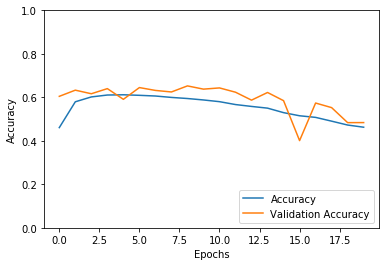

In [ ]:
plt.plot(predictions.history['acc'],label="Accuracy")
plt.plot(predictions.history['val_acc'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc=4)
test_loss,test_acc = model3.evaluate(x_test,y_test,verbose=2)

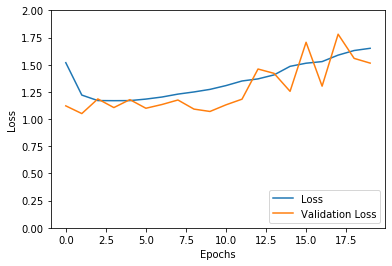

In [ ]:
plt.plot(predictions.history['loss'],label="Loss")
plt.plot(predictions.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,2])
plt.legend(loc=4)
test_loss,test_acc = model3.evaluate(x_test,y_test,verbose=2)

In [ ]:
model4 = createModel()
model4.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)              

In [ ]:
import keras
model4.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
predictions = model4.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 25s 498us/step - loss: 1.7144 - acc: 0.4087 - val_loss: 1.6384 - val_acc: 0.4478
Epoch 2/20
50000/50000 [==============================] - 11s 214us/step - loss: 1.4211 - acc: 0.5290 - val_loss: 1.3645 - val_acc: 0.5490
Epoch 3/20
50000/50000 [==============================] - 11s 214us/step - loss: 1.2916 - acc: 0.5829 - val_loss: 1.2291 - val_acc: 0.6128
Epoch 4/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.2000 - acc: 0.6151 - val_loss: 1.2705 - val_acc: 0.5952
Epoch 5/20
50000/50000 [==============================] - 11s 214us/step - loss: 1.1360 - acc: 0.6412 - val_loss: 1.0865 - val_acc: 0.6550
Epoch 6/20
50000/50000 [==============================] - 11s 214us/step - loss: 1.0834 - acc: 0.6619 - val_loss: 1.1512 - val_acc: 0.6503
Epoch 7/20
500

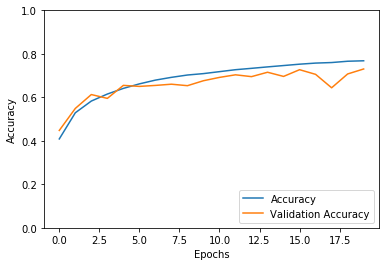

In [ ]:
plt.plot(predictions.history['acc'],label="Accuracy")
plt.plot(predictions.history['val_acc'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc=4)
test_loss,test_acc = model4.evaluate(x_test,y_test,verbose=2)

In [ ]:
model5 = createModel()
model5.summary()
model5.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
predictions = model5.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")
BS=32

model5.save("myfirst")
model5 = load_model("myfirst")
H = model5.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // 32,
	epochs=20)


Epoch 1/20
1562/1562 [==============================] - 38s 24ms/step - loss: 1.2362 - acc: 0.6100 - val_loss: 1.0464 - val_acc: 0.6859
Epoch 2/20
1562/1562 [==============================] - 38s 24ms/step - loss: 1.1866 - acc: 0.6240 - val_loss: 1.3578 - val_acc: 0.6223
Epoch 3/20
1562/1562 [==============================] - 38s 25ms/step - loss: 1.1749 - acc: 0.6291 - val_loss: 1.0003 - val_acc: 0.6968
Epoch 4/20
1562/1562 [==============================] - 38s 24ms/step - loss: 1.1515 - acc: 0.6352 - val_loss: 0.9737 - val_acc: 0.7012
Epoch 5/20
1562/1562 [==============================] - 38s 24ms/step - loss: 1.1395 - acc: 0.6416 - val_loss: 0.9768 - val_acc: 0.7074
Epoch 6/20
1331/1562 [========================>.....] - ETA: 5s - loss: 1.1331 - acc: 0.6442

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(H.history['acc'],label="Accuracy")
plt.plot(H.history['val_acc'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc=4)
test_loss,test_acc = model5.evaluate(x_test,y_test,verbose=2)